In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
pip install seaborn

In [6]:
import seaborn as sns

In [7]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


EDA

Features Description:

Numerical features:
1)Item_Weight : Weight of the product or item.
2)Item_Visibility : The % of the total display area of all products in a store allocated to the particular product.
3)Item_MRP : Maximum Retail Price (list price) of the product
4)Outlet_Establishment_Year : The year in which the store was established.
5)Item_Outlet_Sales : sales of the product in a particular store. This is the target variable to be predicted.

Categorical features:
1)Item_Identifier : Unique product ID (we would want to drop this column later)
2)Item_Fat_Content : Whether the product is low, fat or not
3)Item_Type : The category to which the product belongs.
4)Outlet_Identifier : Unique store ID
5)Outlet_Size : The size of the store in terms of ground area covered.
6)Outlet_Location_Type : The type of city in which the store is located.
7)Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket.

In [10]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


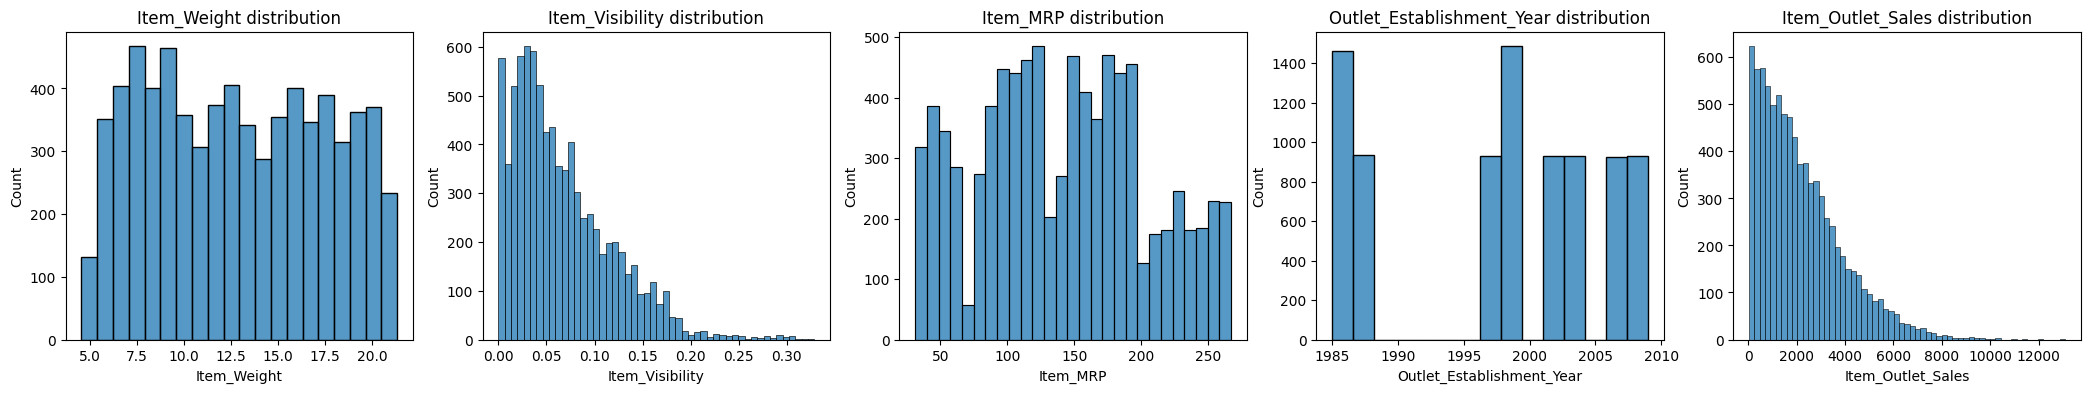

In [12]:
num_cols = len(numeric_cols)
_, ax = plt.subplots(nrows=1, ncols=num_cols, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.histplot(train[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

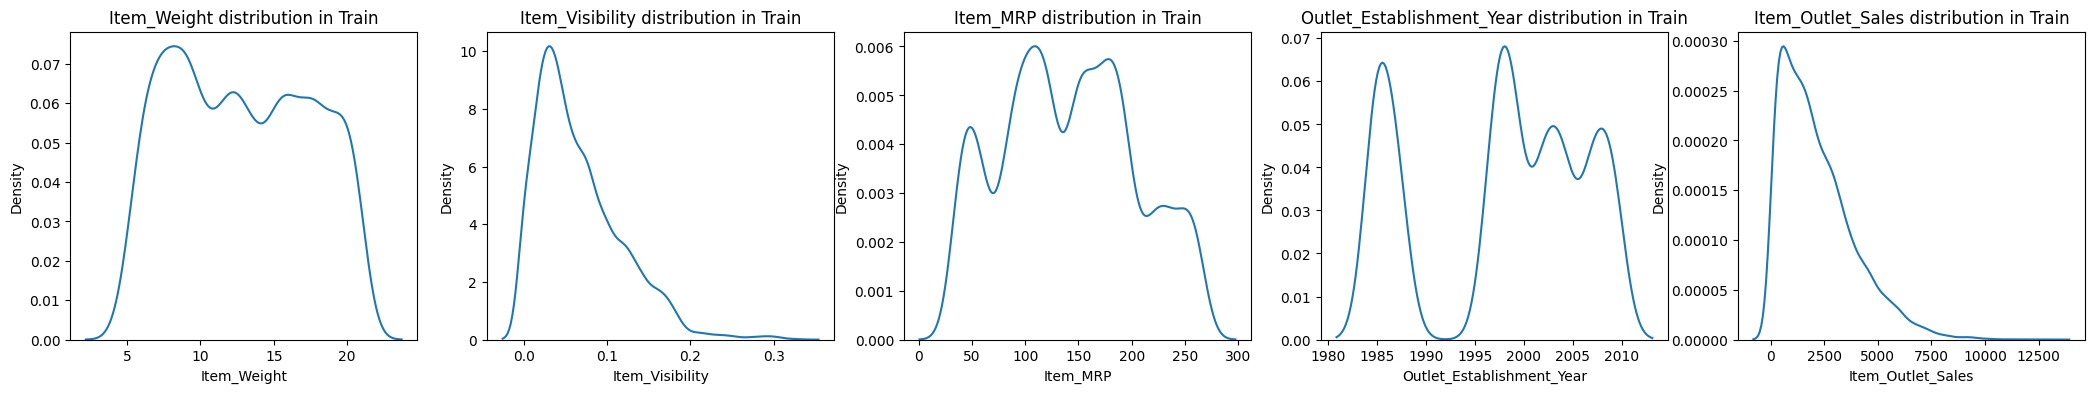

In [13]:
num_cols = len(numeric_cols)
_, ax = plt.subplots(nrows=1, ncols=num_cols, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.kdeplot(data=train, x=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Train')

<ipython-input-14-be031ac94715>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[col], kde=True, ax=ax[index])
<ipython-input-14-be031ac94715>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[col], kde=True, ax=ax[index])
<ipython-input-14-be031ac94715>:4: UserWarning: 

`distplot` is 

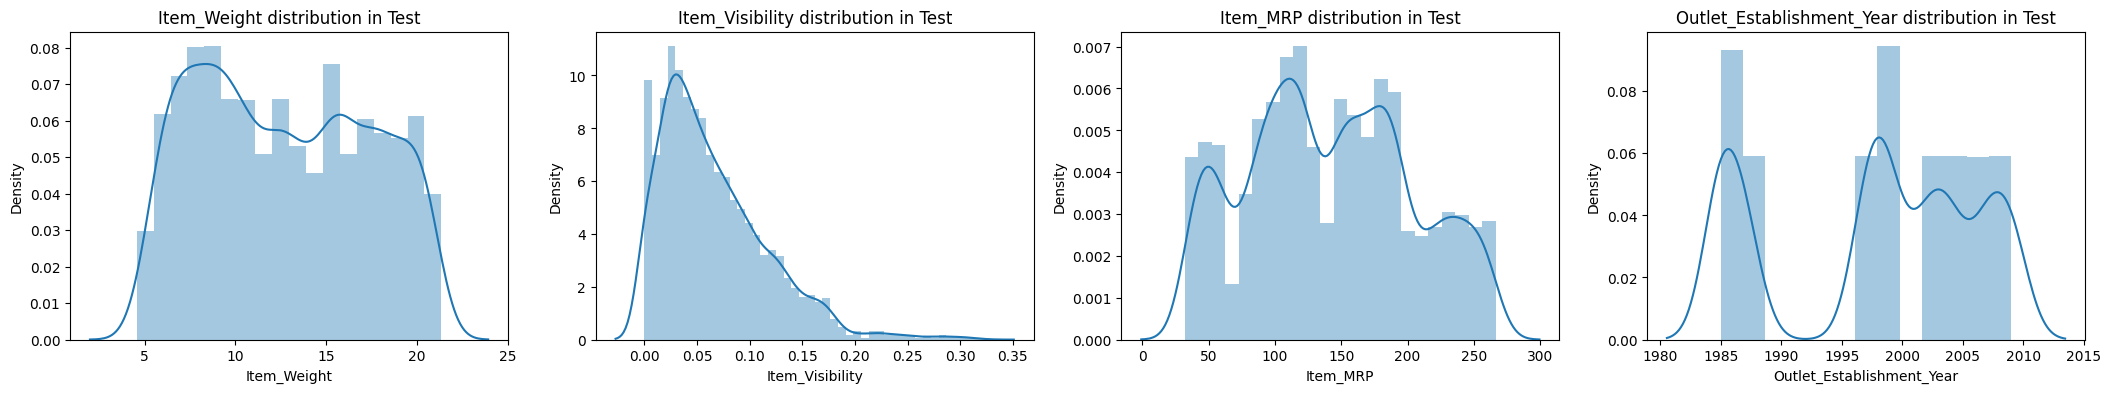

In [14]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']):
    sns.distplot(test[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Test')

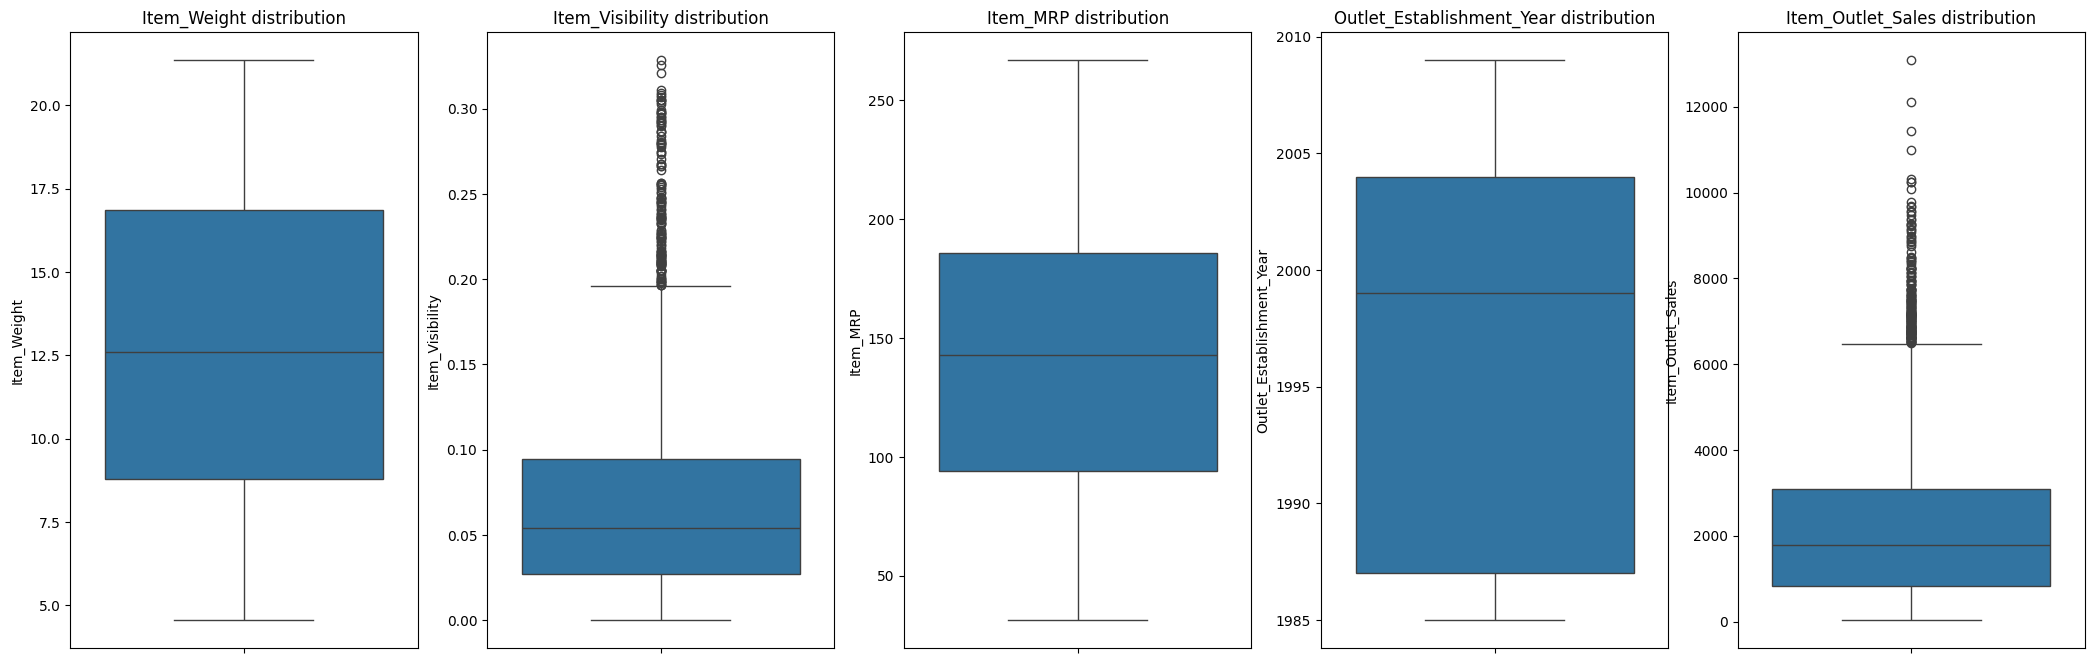

In [15]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.boxplot(data=train, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

Item_Visibility 및 Item_Outlet_Sales 기능에는 몇 가지 이상치를 제거해야 합니다.

In [16]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
categorical_cols_to_display = [
                                 'Item_Fat_Content',
                                 'Item_Type',
                                 'Outlet_Size',
                                 'Outlet_Location_Type',
                                 'Outlet_Type'
                                ]

<ipython-input-18-24823ba6dbd8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
<ipython-input-18-24823ba6dbd8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
<ipython-input-18-24823ba6dbd8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
<ipython-input-18-24823ba6dbd8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
<ipython-input-18-24823ba6dbd8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)


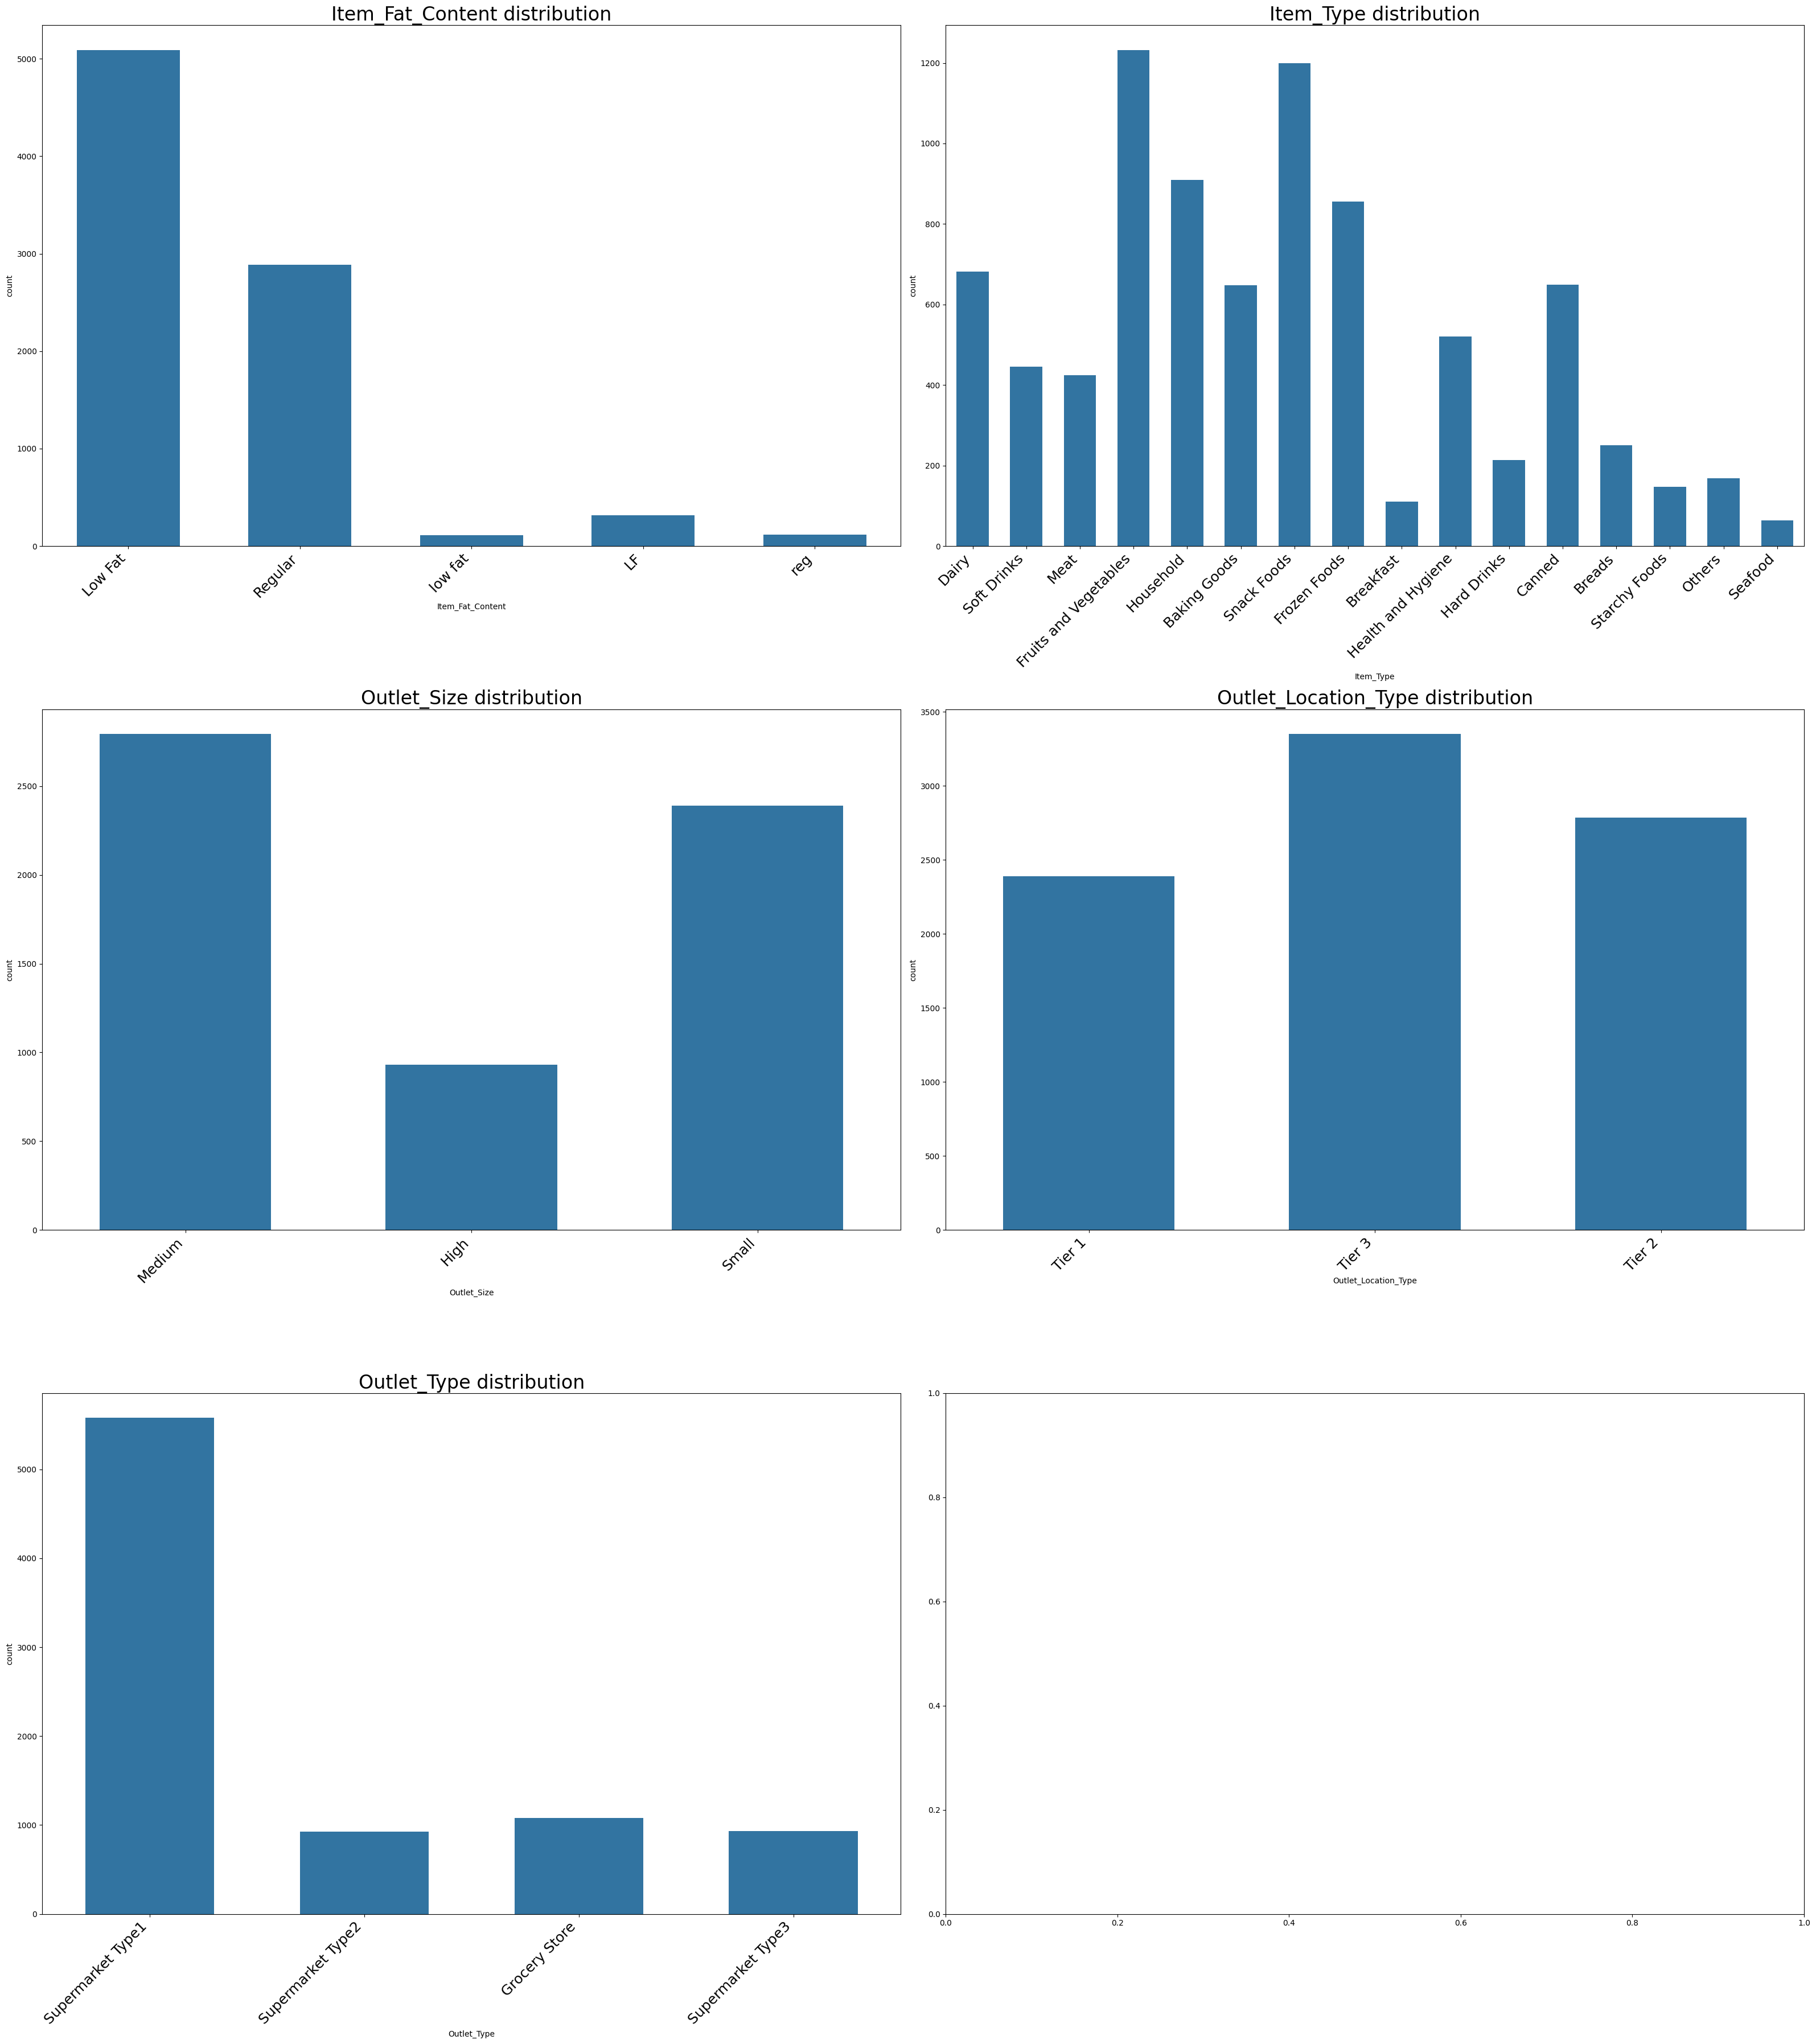

In [18]:
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 36))

for index, col in enumerate(categorical_cols_to_display):
    r = index // 2
    c = index % 2
    g = sns.countplot(data=train, x=col , ax=ax[r][c], width=0.6)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
    ax[r][c].set_title(f'{col} distribution', fontsize=24)
    plt.tight_layout()

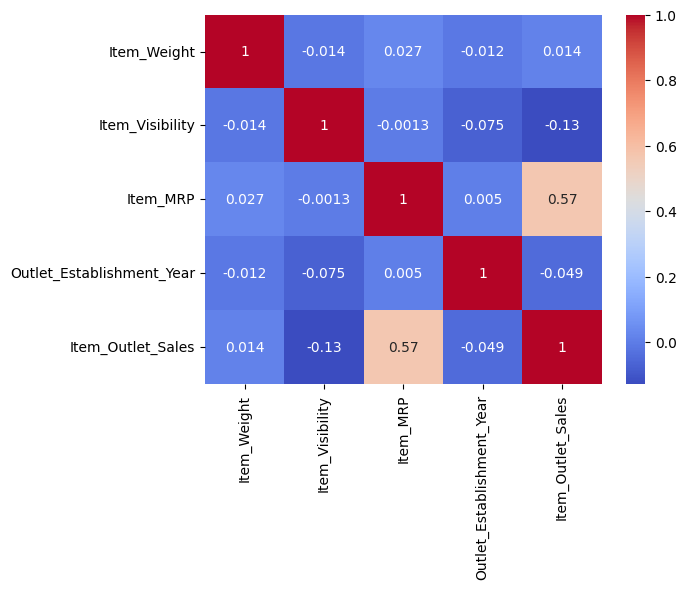

In [19]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

PreProcessing

In [20]:
# for train
train['Outlet_Size'] = train.Outlet_Size.fillna(train.Outlet_Size.dropna().mode()[0])
train['Item_Weight'] = train.Item_Weight.fillna(train.Item_Weight.mean())

# for test
test['Outlet_Size'] = test.Outlet_Size.fillna(test.Outlet_Size.dropna().mode()[0])
test['Item_Weight'] = test.Item_Weight.fillna(test.Item_Weight.mean())

In [21]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

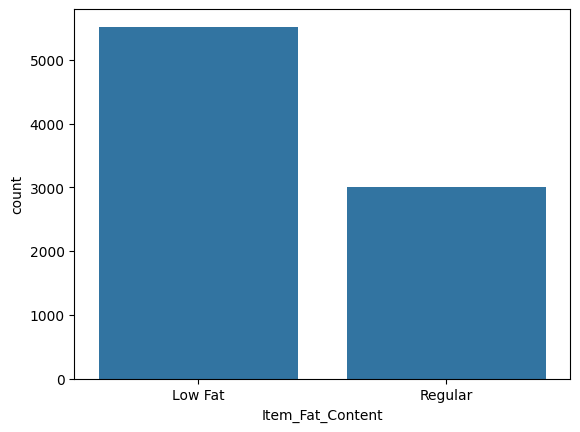

In [22]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

sns.countplot(x=train['Item_Fat_Content']);

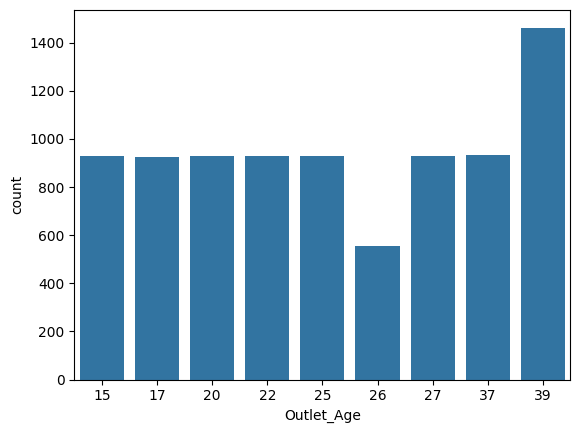

In [23]:
train['Outlet_Age'] = 2024 - train['Outlet_Establishment_Year']
test['Outlet_Age'] = 2024 - test['Outlet_Establishment_Year']

del train['Outlet_Establishment_Year']
del test['Outlet_Establishment_Year']

sns.countplot(x=train['Outlet_Age']);

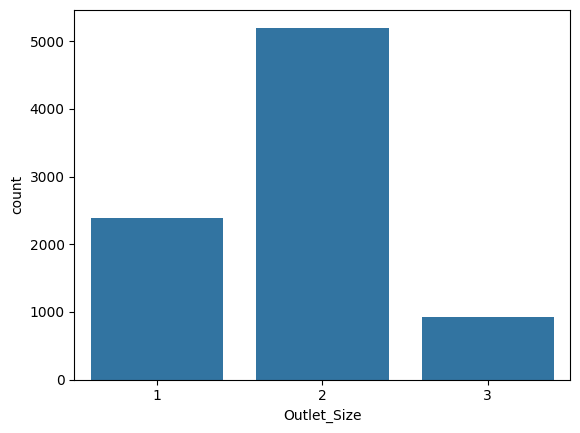

In [24]:
#label encoding
train['Outlet_Size'] = train['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)

test['Outlet_Size'] = test['Outlet_Size'].map({'Small'  : 1,
                                               'Medium' : 2,
                                               'High'   : 3
                                              }).astype(int)

sns.countplot(x=train['Outlet_Size']);

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

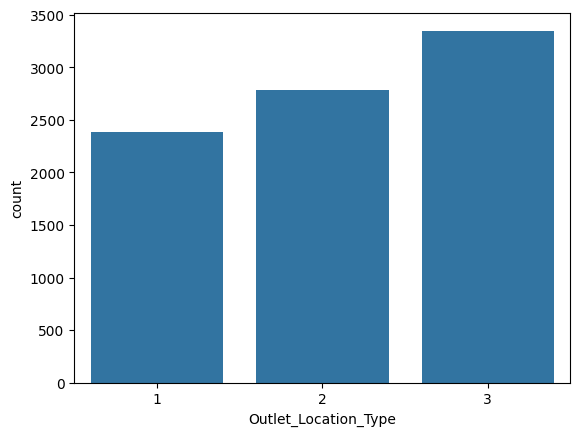

In [25]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].str[-1:].astype(int)
test['Outlet_Location_Type']  = test['Outlet_Location_Type'].str[-1:].astype(int)
sns.countplot(x=train['Outlet_Location_Type'])

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

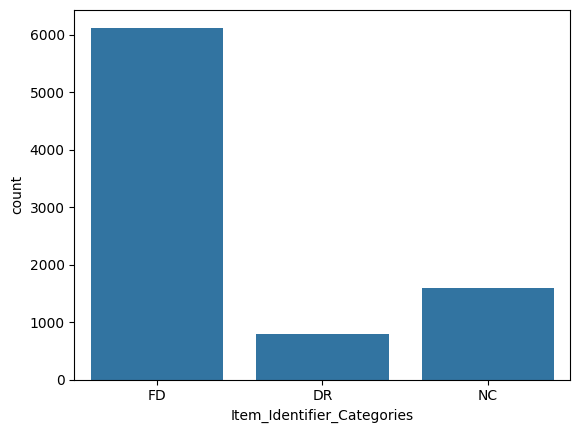

In [26]:
train['Item_Identifier_Categories'] = train['Item_Identifier'].str[0:2] #.astype(int)
test['Item_Identifier_Categories']  = test['Item_Identifier'].str[0:2]

sns.countplot(x=train['Item_Identifier_Categories'])

In [27]:
#Label Encoder for Ordinate Data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ordinal_features = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']

for feature in ordinal_features:
    train[feature] = encoder.fit_transform(train[feature])
    test[feature]  = encoder.fit_transform(test[feature])

train.shape

(8523, 13)

In [28]:
test.shape

(5681, 12)

Onehot encoding

In [29]:
train = pd.get_dummies(train, columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)
test  = pd.get_dummies(test,  columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)

In [30]:
train.drop(labels=['Item_Identifier'], axis=1, inplace=True)
test.drop(labels=['Item_Identifier'],  axis=1, inplace=True)

In [31]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Size                      8523 non-null   int64  
 5   Outlet_Location_Type             8523 non-null   int64  
 6   Outlet_Type                      8523 non-null   int64  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Outlet_Age                       8523 non-null   int64  
 9   Item_Type_Breads                 8523 non-null   bool   
 10  Item_Type_Breakfast              8523 non-null   bool   
 11  Item_Type_Canned                 8523 non-null   bool   
 12  Item_Type_Dairy     

In [32]:
from sklearn.model_selection import train_test_split, cross_validate

from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier

In [33]:
from tqdm import tqdm
models = {"RF": RandomForestRegressor(),
          "GB":GradientBoostingRegressor(),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "ElasticNet": ElasticNet(),
          "KNC":KNeighborsRegressor(),
          "DT":DecisionTreeRegressor(),
         }
for model_name, model in tqdm(models.items(), desc="Model fit", total=len(models)):
    model.fit(X_train, y_train)

Model fit: 100%|██████████| 7/7 [00:08<00:00,  1.18s/it]


In [34]:
from sklearn.metrics import r2_score
#r2 score
r2=[]
from sklearn.metrics import r2_score
for model_name, model in models.items():
  pred = model.predict(X_test)
  acc = r2_score(y_test, pred)
  r2.append(acc)
  print(f"{model_name} / Testing r2: {acc}%")

RF / Testing r2: 0.5401875089579318%
GB / Testing r2: 0.5902523198748948%
SVR / Testing r2: 0.19101165352750882%
LR / Testing r2: 0.5515745829592673%
ElasticNet / Testing r2: 0.4651156212661537%
KNC / Testing r2: 0.4836763215487614%
DT / Testing r2: 0.16119413600382593%


In [35]:
#r2 score
train_r2=[]
from sklearn.metrics import r2_score
for model_name, model in models.items():
  pred = model.predict(X_train)
  acc = r2_score(y_train, pred)
  train_r2.append(acc)
  print(f"{model_name} / Training r2: {acc}%")

RF / Training r2: 0.9375521258188424%
GB / Training r2: 0.6350852322025631%
SVR / Training r2: 0.18798710667909546%
LR / Training r2: 0.566225968016262%
ElasticNet / Training r2: 0.4750375631723869%
KNC / Training r2: 0.6490705875462608%
DT / Training r2: 1.0%


In [36]:
import numpy as np

In [37]:
x_total = np.concatenate((X_train, X_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

In [38]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
rf = RandomForestRegressor() # Create Model Object
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  RFscores = cross_val_score(rf, x_total, y_total,scoring='r2', cv=kfold)
  print('n_splits={}, RandomForest cross validation score: {}'.format(n, RFscores.mean()))

n_splits=3, RandomForest cross validation score: 0.5543778600517083
n_splits=5, RandomForest cross validation score: 0.5600204157628794


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
gb = GradientBoostingRegressor() # Create Model Object
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  GBscores = cross_val_score(rf, x_total, y_total,scoring='r2', cv=kfold)
  print('n_splits={}, GradientBoosting cross validation score: {}'.format(n, GBscores.mean()))

n_splits=3, GradientBoosting cross validation score: 0.5475972863215319
n_splits=5, GradientBoosting cross validation score: 0.5583430204556834


GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(gb, param_grid=params, scoring='r2', cv=3)
grid_gb.fit(x_total, y_total)

print('Optimal Hyperparameters: {0}, Optimal Mean Accuracy: {1:.3f}'.format(grid_gb.best_params_, grid_gb.best_score_))

Optimal Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, Optimal Mean Accuracy: 0.601


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid=params, scoring='r2', cv=3)
grid_rf.fit(x_total, y_total)
print('Optimal Hyperparameters:', grid_rf.best_params_)
print('Optimal Mean R2 Score:', grid_rf.best_score_)

Optimal Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Optimal Mean R2 Score: 0.5860081141836867


In [43]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(x_total, y_total)

print('Optimal Hyperparameters:', grid_search.best_params_)
print('Optimal Mean R2 Score:', grid_search.best_score_)

Optimal Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimal Mean R2 Score: 0.5255812968189103


In [1]:
pip install pycaret

In [34]:
from pycaret.regression import *

setup = setup(data=train, target='Item_Outlet_Sales')

,Description,Value
0,Session id,2471
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 35)"
4,Transformed data shape,"(8523, 35)"
5,Transformed train set shape,"(5966, 35)"
6,Transformed test set shape,"(2557, 35)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [35]:
top5 = compare_models(sort='r2', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,756.9970,1180939.0152,1086.3565,0.5868,0.5516,0.5624,0.9210
lightgbm,Light Gradient Boosting Machine,774.9421,1244249.9737,1115.0573,0.5642,0.5534,0.5725,0.5350
rf,Random Forest Regressor,784.1913,1268249.6473,1125.4066,0.5561,0.5515,0.5672,3.7190
lasso,Lasso Regression,836.1792,1277491.4875,1129.9212,0.5531,0.7328,1.0413,0.0600
llar,Lasso Least Angle Regression,836.1793,1277491.2250,1129.9211,0.5531,0.7327,1.0413,0.0360
br,Bayesian Ridge,836.5636,1279580.6500,1130.8440,0.5524,0.7339,1.0398,0.0570
ridge,Ridge Regression,837.1020,1280184.4750,1131.1089,0.5522,0.7327,1.0456,0.0340
lr,Linear Regression,837.1844,1280305.8500,1131.1624,0.5522,0.7329,1.0462,0.7610
huber,Huber Regressor,833.1118,1302151.6458,1140.7544,0.5447,0.7112,0.9643,0.1630
ada,AdaBoost Regressor,877.7694,1355234.2928,1163.7104,0.5249,0.7608,1.0887,0.1650


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [36]:
tuned_top5 = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,836.4105,1217292.9899,1103.3100,0.5472,0.6400,0.8204
1,867.8783,1394083.9281,1180.7133,0.5258,0.7730,1.1025
2,856.9536,1334118.2650,1155.0404,0.5440,0.7507,1.0372
3,807.2386,1283850.2784,1133.0712,0.5730,0.6931,0.9325
4,822.2091,1287973.4045,1134.8892,0.5631,0.7138,0.9695
5,813.3329,1175286.0146,1084.1061,0.5175,0.7425,1.0776
6,841.5188,1307849.6689,1143.6126,0.5517,0.7387,1.0515
7,852.6738,1329405.4780,1152.9985,0.5492,0.7290,1.1368
8,847.9357,1261350.4829,1123.0986,0.5513,0.7103,0.9762


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,784.1074,1173069.0182,1083.0831,0.5636,0.5302,0.5185
1,780.3744,1307842.2476,1143.6093,0.5551,0.6058,0.5697
2,768.4385,1188112.7804,1090.0059,0.5939,0.5844,0.5774
3,739.3341,1166305.7464,1079.9564,0.6121,0.5466,0.5342
4,755.3615,1166942.5891,1080.2512,0.6041,0.5735,0.6150
5,716.7855,1081376.3446,1039.8925,0.5560,0.6217,0.6141
6,740.2298,1176009.8384,1084.4399,0.5969,0.5780,0.6067
7,760.8989,1159007.4944,1076.5721,0.6070,0.5578,0.5570
8,764.5497,1142122.0649,1068.7011,0.5937,0.5530,0.5277


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,777.2063,1152526.2729,1073.5578,0.5713,0.5066,0.5127
1,771.6913,1301430.1702,1140.8024,0.5573,0.5322,0.5378
2,753.6917,1165938.0753,1079.7861,0.6015,0.5170,0.5181
3,727.7964,1131238.4210,1063.5969,0.6237,0.5233,0.5227
4,754.0100,1162521.5842,1078.2029,0.6056,0.5511,0.5756
5,710.0574,1089153.7825,1043.6253,0.5528,0.5553,0.5805
6,743.3256,1200419.3492,1095.6365,0.5885,0.5551,0.5811
7,746.7777,1149464.8660,1072.1310,0.6103,0.5271,0.5398
8,761.1065,1130529.7930,1063.2637,0.5979,0.5242,0.5257


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,832.0329,1196034.6250,1093.6337,0.5551,0.6650,0.8371
1,859.3920,1369604.7500,1170.3011,0.5341,0.7338,1.1067
2,851.7842,1303088.3750,1141.5289,0.5546,0.7354,1.0637
3,800.1068,1254774.2500,1120.1671,0.5826,0.7285,0.9302
4,812.0598,1248757.3750,1117.4781,0.5764,0.7126,0.9915
5,814.1320,1190981.5000,1091.3210,0.5110,0.7550,1.0936
6,834.9470,1289274.6250,1135.4623,0.5581,0.7507,1.0487
7,844.3306,1301156.5000,1140.6825,0.5588,0.7491,1.1488
8,834.1658,1224514.1250,1106.5776,0.5644,0.7487,0.9757


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,833.0606,1199029.3750,1095.0020,0.5540,0.6575,0.8421
1,859.4043,1370525.0000,1170.6942,0.5338,0.7338,1.1124
2,853.1757,1306068.1250,1142.8334,0.5536,0.7513,1.0730
3,801.0581,1256731.5000,1121.0404,0.5820,0.6970,0.9366
4,813.8690,1250646.2500,1118.3230,0.5757,0.7088,0.9987
5,814.4528,1190923.6250,1091.2944,0.5111,0.7539,1.0994
6,835.5992,1290854.5000,1136.1578,0.5575,0.7647,1.0555
7,845.6620,1304065.2500,1141.9568,0.5578,0.7440,1.1632
8,834.6749,1225161.1250,1106.8700,0.5642,0.7301,0.9806


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [37]:
blender_top5 = blend_models(estimator_list=tuned_top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,789.5932,1138251.0645,1066.8885,0.5766,0.5555,0.6138
1,790.6869,1282191.4205,1132.3389,0.5638,0.6212,0.7197
2,779.4780,1187926.2956,1089.9203,0.5940,0.6584,0.6877
3,745.4206,1156479.5020,1075.3974,0.6153,0.5972,0.6439
4,764.9759,1161501.3922,1077.7297,0.6060,0.6503,0.7009
5,736.0690,1084882.8529,1041.5771,0.5546,0.6229,0.7402
6,764.5511,1182662.9063,1087.5031,0.5946,0.6507,0.7323
7,776.3574,1178403.8599,1085.5431,0.6004,0.6590,0.7455
8,779.5997,1133830.7022,1064.8149,0.5967,0.6061,0.6659


Processing:   0%|          | 0/6 [00:00<?, ?it/s]